<a href="https://colab.research.google.com/github/arbiterFF/Modern-Portfolio-Theory/blob/main/Montecarlo_US_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Import required libraries
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

# Define the stocks in your portfolio
stocks = ['MSFT', 'NVDA', 'TMO', 'ITA', 'GS', 'TJX', 'TMUS', 'SBUX', 'MAT', 'FMC', 'MGM', 'LYV', 'V', 'COP', 'NKE', 'AAPL', 'TSM']

# Set the time period
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=30)

# Fetch the stock price data
price_data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']
price_data = price_data.reindex(sorted(price_data.columns), axis=1)

# Calculate daily returns
returns = price_data.pct_change().dropna()

# Calculate mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Set the risk-free rate
risk_free_rate = 0.04

# Initialize variables to store the best portfolio weights and highest Sharpe ratio
best_weights = None
highest_sharpe = -np.inf

# Set the number of random portfolios to generate
num_portfolios = 100000

# Initialize arrays to store portfolio returns, volatilities, Sharpe ratios, and weights
portfolio_returns = np.zeros(num_portfolios)
portfolio_volatilities = np.zeros(num_portfolios)
sharpe_ratios = np.zeros(num_portfolios)
all_weights = np.zeros((num_portfolios, len(stocks)))

# Set the minimum weight for each stock
min_weight = 0 #0.2/len(stocks)
print(f"Minimum weight for each stock: {min_weight:.4f}")

# Generate random portfolios
for i in range(num_portfolios):
    # Generate random portfolio weights with minimum weight constraint
    weights = np.random.random(len(stocks))
    weights = min_weight + (1 - len(stocks) * min_weight) * (weights / np.sum(weights))

    # Calculate portfolio return and volatility
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)) * 252)

    # Calculate Sharpe ratio
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

    # Update the best portfolio weights and highest Sharpe ratio if necessary
    if sharpe_ratio > highest_sharpe:
        best_weights = weights
        highest_sharpe = sharpe_ratio

    # Store portfolio returns, volatilities, Sharpe ratios, and weights
    portfolio_returns[i] = portfolio_return
    portfolio_volatilities[i] = portfolio_volatility
    sharpe_ratios[i] = sharpe_ratio
    all_weights[i, :] = weights

# Print the best portfolio weights and highest Sharpe ratio
print("Best portfolio weights:")
for stock, weight in zip(stocks, best_weights):
    print(f"{stock}: {weight:.4f}")
print("Highest Sharpe ratio:", highest_sharpe)

[*********************100%***********************]  17 of 17 completed
Minimum weight for each stock: 0.0000
Best portfolio weights:
MSFT: 0.0419
NVDA: 0.0461
TMO: 0.0214
ITA: 0.0419
GS: 0.0166
TJX: 0.1668
TMUS: 0.1460
SBUX: 0.0150
MAT: 0.1568
FMC: 0.0177
MGM: 0.1399
LYV: 0.0474
V: 0.0037
COP: 0.0600
NKE: 0.0339
AAPL: 0.0017
TSM: 0.0432
Highest Sharpe ratio: 3.031648538699111


<ipython-input-37-b5cbedbfd3f9>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab20', len(stocks))
<ipython-input-37-b5cbedbfd3f9>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(portfolio_volatilities[dominant_stock_filter], portfolio_returns[dominant_stock_filter], c=distinct_colors[stock_idx], marker='o', s=30, label=f'{stock} dominant', alpha=0.8)


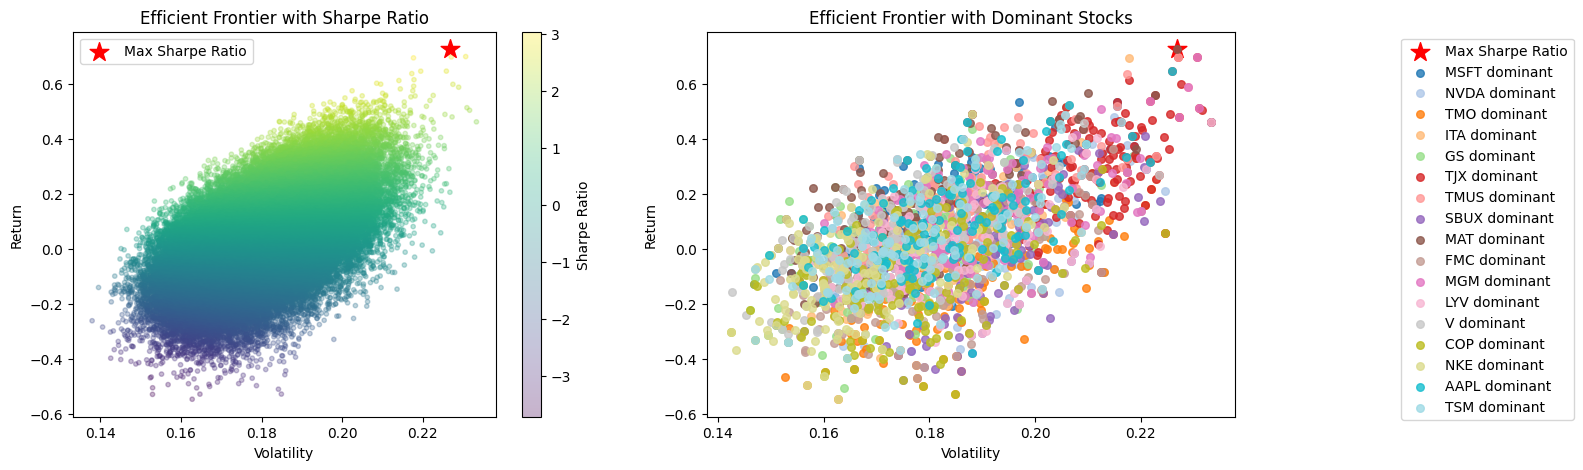

In [37]:
from matplotlib import cm

# Create a colormap with 20 distinct colors
colormap = cm.get_cmap('tab20', len(stocks))
distinct_colors = [colormap(i) for i in range(len(stocks))]

# Set the threshold for dominant weight
dominant_weight_threshold = 0.15

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the efficient frontier with Sharpe ratio color scale on the first subplot
sc1 = ax1.scatter(portfolio_volatilities, portfolio_returns, c=sharpe_ratios, cmap='viridis', marker='o', s=10, alpha=0.3)
ax1.scatter(portfolio_volatilities[np.argmax(sharpe_ratios)], portfolio_returns[np.argmax(sharpe_ratios)], c='red', marker='*', s=200, label='Max Sharpe Ratio')
ax1.set_xlabel('Volatility')
ax1.set_ylabel('Return')
ax1.set_title('Efficient Frontier with Sharpe Ratio')
ax1.legend()
fig.colorbar(sc1, ax=ax1, label='Sharpe Ratio')

# Plot the efficient frontier with dominant stocks on the second subplot
ax2.scatter(portfolio_volatilities[np.argmax(sharpe_ratios)], portfolio_returns[np.argmax(sharpe_ratios)], c='red', marker='*', s=200, label='Max Sharpe Ratio')

for stock_idx, stock in enumerate(stocks):
    dominant_stock_filter = all_weights[:, stock_idx] > dominant_weight_threshold
    ax2.scatter(portfolio_volatilities[dominant_stock_filter], portfolio_returns[dominant_stock_filter], c=distinct_colors[stock_idx], marker='o', s=30, label=f'{stock} dominant', alpha=0.8)

ax2.set_xlabel('Volatility')
ax2.set_ylabel('Return')
ax2.set_title('Efficient Frontier with Dominant Stocks')
ax2.legend(bbox_to_anchor=(1.3, 1), loc='upper left')

plt.show()

In [38]:
# Calculate the annualized expected return and volatility for each stock
annualized_returns = returns.mean() * 252
annualized_volatility = returns.std() * np.sqrt(252)

# Calculate the Sharpe ratio for each stock
sharpe_ratios_individual = (annualized_returns - risk_free_rate) / annualized_volatility

# Create a DataFrame with expected return, volatility, and Sharpe ratio for each stock
stock_stats = pd.DataFrame({'Expected Return': annualized_returns, 'Volatility': annualized_volatility, 'Sharpe Ratio': sharpe_ratios_individual})

# Sort the DataFrame by expected return in descending order
stock_stats = stock_stats.sort_values(by='Expected Return', ascending=False)

# Print the table
print(stock_stats)

      Expected Return  Volatility  Sharpe Ratio
LYV          2.447347    0.547531      4.396729
MAT          1.189077    0.328045      3.502797
NVDA         1.101570    0.346672      3.062177
MSFT         1.094626    0.310178      3.400071
AAPL         0.478954    0.215894      2.033193
TSM          0.420054    0.332988      1.141346
TJX          0.245795    0.161945      1.270769
V           -0.011749    0.170299     -0.303874
GS          -0.114862    0.204656     -0.756694
SBUX        -0.124762    0.360343     -0.457236
COP         -0.395216    0.280531     -1.551398
ITA         -0.442331    0.161522     -2.986163
MGM         -0.606736    0.342774     -1.886773
TMUS        -0.695303    0.216093     -3.402720
NKE         -0.887950    0.213339     -4.349643
TMO         -1.339627    0.244117     -5.651506
FMC         -1.682864    0.262113     -6.572993
